In [1]:
import numpy as np
import pandas as pd

In [3]:
cctv_seoul = pd.read_csv('./../data/CCTV_in_Seoul.csv')
cctv_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [4]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
cctv_seoul.columns[0]

'기관명'

In [6]:
# inplace = True : 변수의 내용을 갱신하라는 의미
cctv_seoul.rename(columns = {cctv_seoul.columns[0]: '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
# 몇 번째 줄 부터 읽을 것인지 : header, parse_cols > usecols : 해당 열만 읽도록
pop_seoul = pd.read_excel('./../data/population_in_Seoul.xls',
                          header=2,
                          usecols='B, D, G, J, N'
                          )
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_seoul.rename(columns={
    pop_seoul.columns[0]: '구별',
    pop_seoul.columns[1]: '인구',
    pop_seoul.columns[2]: '한국인',
    pop_seoul.columns[3]: '외국인',
    pop_seoul.columns[4]: '고령자'}, inplace=True)
pop_seoul.head()

,구별,인구,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 1-4. pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

In [10]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


* cctv의 전체 개수가 가장 작은 구는 도봉구, 마포구, 송파구, 중랑구, 중구

In [11]:
cctv_seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


* cctv가 가장 많은 구는 강남구, 양천구, 서초구, 은평구, 용산구로 나타남

In [12]:
cctv_seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


* 특히 2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 최근 3년간 CCTV 증가율을 계산
* 최근 3년간 cctv가 그 이전 대비 많이 증가한 구는 종로구, 도봉구, 마포구, 노원구, 강동구

In [13]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [14]:
pop_seoul.head()

,구별,인구,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


* 0번 행의 합계 삭제

In [15]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [16]:
# unique : 반복된 데이터 중 한 번 이상 나타난 데이터 확인
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [17]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [18]:
pop_seoul.drop([26], inplace=True)

* 각 구별 전체 인구를 이용해서 구별 외국인 비율과 고령자 비율 계산
* 인구 수로 정렬 시, 송파구, 강서구, 강남구, 노원구, 관악구 순으로 인구가 많음

In [20]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구'] * 100
pop_seoul.head()

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [21]:
pop_seoul.sort_values(by='인구', ascending=False).head(5)

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


* 외국인 숫자가 많은 구는 영등포, 구로구, 금천구, 관악구, 동대문구
* 외국인 비율이 높은 구는 영등포, 금천구, 구로구, 중구, 용산구

In [22]:
pop_seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [23]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


* 고령자가 많은 구는 강서구, 송파구, 은평구, 노원구, 관악구
* 고령자 비율이 높은 구는 강북구, 종로구, 중구, 용산구, 서대문구

In [24]:
pop_seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 1-6. CCTV 데이터와 인구 현황 데이터를 합치고 분석

In [26]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


* 행 방향으로 삭제하기 : drop
* 열 방향으로 삭제하기 : del

In [27]:
# 의미 없는 컬럼 지우기
del data_result['2013년도 이전']

In [29]:
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [30]:
data_result.head()

,구별,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [31]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


* 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 볼 수 있음
* 상관분석 문서에는 상관계수의 절대값이 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계라 함
* numpy의 corrcoef 명령을 사용하면 됨

In [33]:
import numpy as np

In [34]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [35]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [37]:
np.corrcoef(data_result['인구'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

* CCTV 개수와 고령자비율은 약한 음의 상관관계이고, 외국인비율과는 큰 의미가 없음
* 인구와의 상관계수는 0.3으로 약한 상관관계가 있다고 볼 수 있음

In [38]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [39]:
data_result.sort_values(by='인구', ascending=False).head(5)

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 1-8. CCTV 현황 그래프로 분석하기d

* %matplotlib inline : 그래프의 결과를 출력 세션에 나타나게 하는 설정

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System...Sorry!')

NameError: name 'plt' is not defined

In [42]:
data_result.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


* barh : 수평 바 그래프 그리기
* grid=True : 격자 무늬 그리기
* figsize를 정했어도 표현되는 곳이 웹 브라우저이므로 항상 그 크기를 유지하는 것은 아닐 수 있음

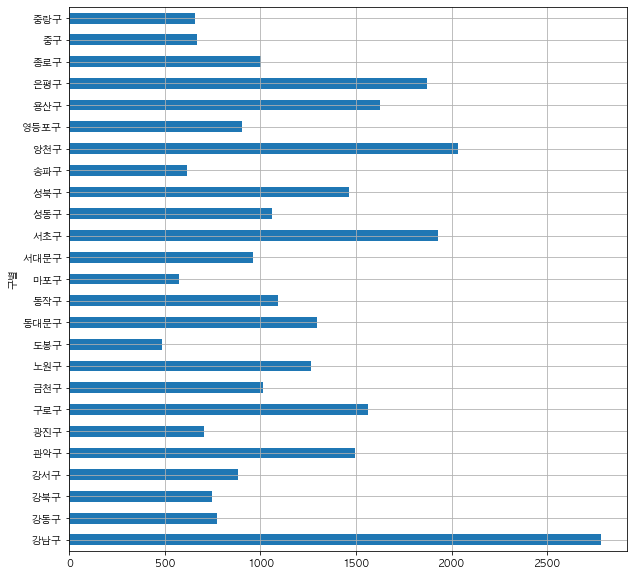

In [43]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

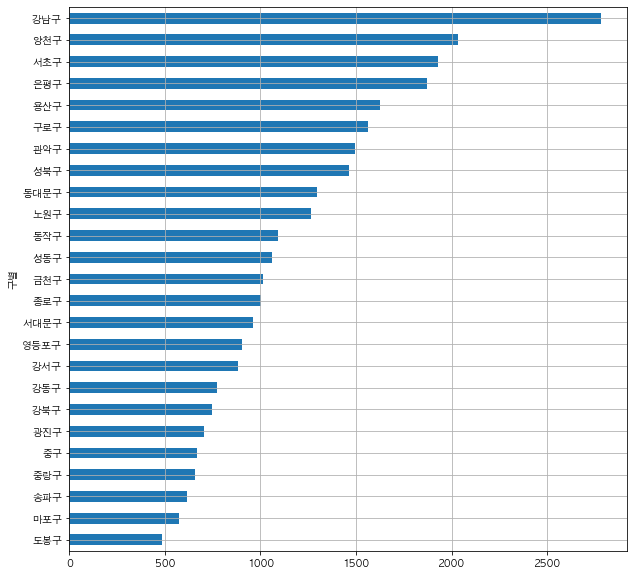

In [44]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

* cctv 개수는 강남구가 월등
* 그 뒤를 이어 양천구, 서초구, 은평구가 꽤 많은 cctv가 설최됨을 알 수 있음

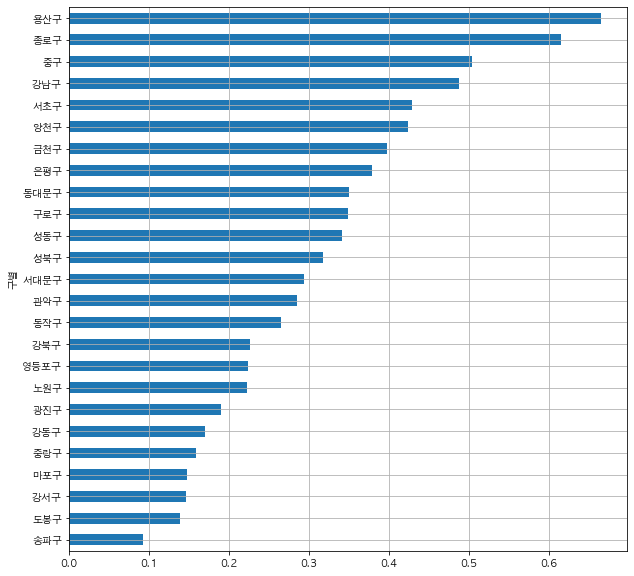

In [45]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

* 인구 대비 cctv 수를 보니 용산구와 종로구가 월등히 높음
* 그에 비해 송파구는 인구 대비 cctv 비율이 낮음

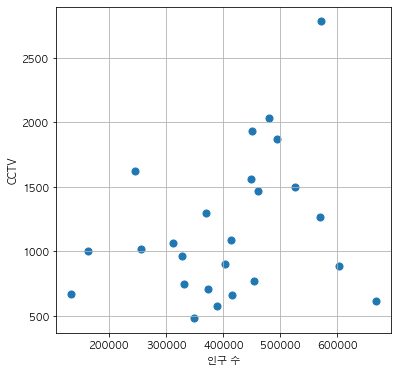

In [46]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구'], data_result['소계'], s=50) # s : 마커의 크기
plt.xlabel('인구 수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

* numpy의 polyfit 명령으로 손쉽게 직선을 만들 수 있음

In [47]:
fp1 = np.polyfit(data_result['인구'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [50]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

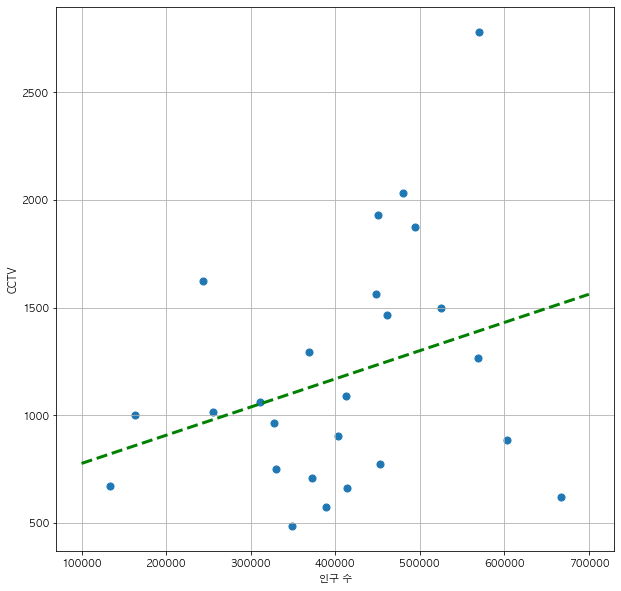

In [51]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구 수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

* 오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬해서 다시 저장하기

In [52]:
fp1 = np.polyfit(data_result['인구'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


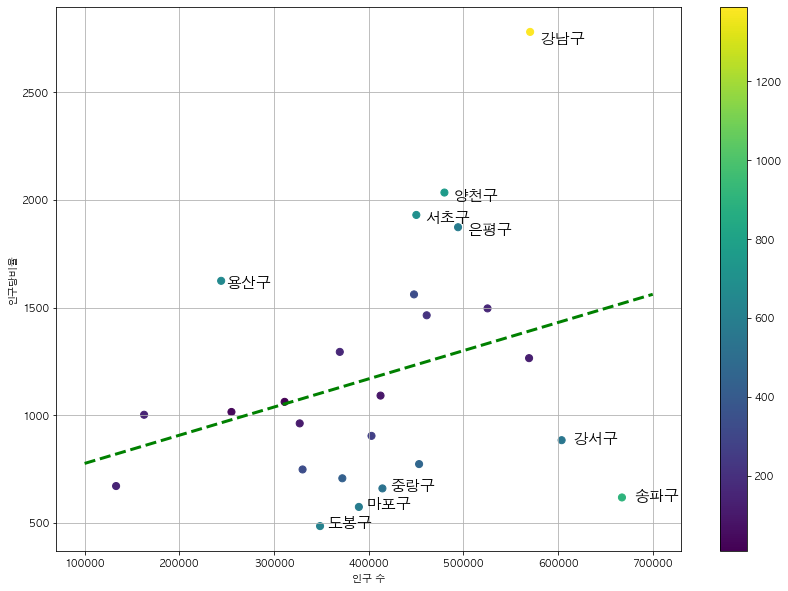

In [53]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구'][n] * 1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구 수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

* 직선을 기준으로 위에 있는 강남구, 양천구, 서초구, 은평구, 용산구는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역임
* 송파구, 도봉구, 강서구, 마포구, 중랑구는 일반적인 경향보다 cctv가 적게 설치된 지역